# Python Extention Guide & Reference
CURRENTLY UNFINISHED - WORK IN PROGRESS

Maintained and supported by Daniel DeWitt

One of Python's biggest advantages is its abundance of open source libraries. In this notebook, I provide a brief overview of the most important libraries for test automation. I use all of these libraries regularly, if not all in one script. Remember that to use extension libraries, you must **import** them beforehand.

## Plotting with Matplotlib
We can generally understand trends in data by using a plotting program to chart it. Python has a wonderful plotting library called [Matplotlib](http://matplotlib.sf.net). The IPython notebook interface we are using for these notes has that functionality built in. Users familiar with MatLAB's plotting will feel right at home with Matplotlib.

First, let's import the pyplot library with an alias (and the math library as well).

In [71]:
import matplotlib.pyplot as plt
import math

As an example, let's look at the functions $x^{2}$ and $x!$. Which one grows the fastest? Let's plot them. First, let's generate squares for sequence of length 10:

In [94]:
squares = [x*x for x in range(10)]

Next lets generate the factorials.

In [99]:
facts = [math.factorial(i) for i in range(10)]

Now we use the Matplotlib function **plot()** to compare the two. Just like in MatLAB, we have to call the **show()** function to display the plot.

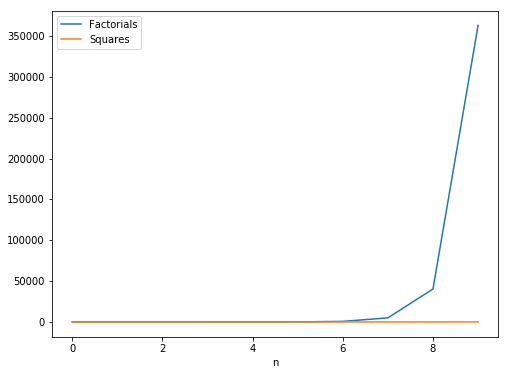

In [100]:
plt.figure(figsize=(8,6))
plt.plot(facts,label="Factorials")
plt.plot(squares,label="Squares")
plt.xlabel("n")
plt.legend()
plt.show()

The factorial function grows much faster. In fact, you can't even see the Fibonacci sequence. It's not entirely surprising: a function where we multiply by n each iteration is bound to grow faster than one where we add (roughly) n each iteration.

Let's plot these on a semilog plot so we can see them both a little more clearly:

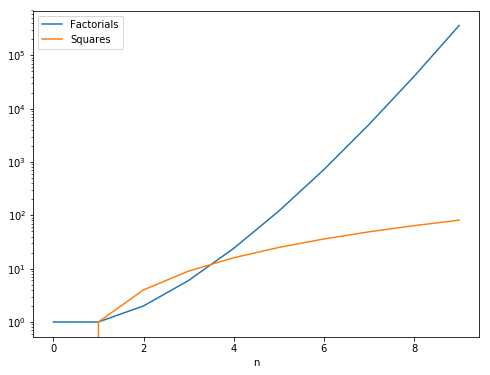

In [101]:
plt.figure(figsize=(8,6))
plt.semilogy(facts,label="Factorials")
plt.semilogy(squares,label="Squares")
plt.xlabel("n")
plt.legend()
plt.show()

There are many more things you can do with Matplotlib. We'll be looking at some of them in the sections to come. In the meantime, if you want an idea of the different things you can do, look at the Matplotlib [Gallery](http://matplotlib.org/gallery.html). Rob Johansson's IPython notebook [Introduction to Matplotlib](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) is also particularly good.

## Instrument Control with PyVISA
PyVISA provides a straightforward and object-oriented way of interfacing with GPIB (IEEE-488) I/O devices. In order for PyVISA to work, you need to have a suitable backend. You need to download and install the library yourself. There are multiple VISA implementations from different vendors, and they _should_ all work with PyVISA. That being said, PyVISA is tested only against [National Instruments’s VISA libraries](http://www.ni.com/download/ni-visa-17.0/6646/en/). Once you have the VISA libraries installed, connect your computer to a GPIB device and you're ready to use PyVISA.

As always, let's start by importing the library.

In [84]:
import visa

We first declare a resource manager object which we use to initialize our connections to instruments.

In [86]:
rm = visa.ResourceManager()

To get a list of available instrument addresses, we query the resource manager with the method **list_resources()**

In [87]:
rm.list_resources()

('GPIB0::13::INSTR',
 'GPIB0::14::INSTR',
 'GPIB0::15::INSTR',
 'GPIB0::27::INSTR',
 'GPIB0::6::INSTR',
 'GPIB0::7::INSTR',
 'ASRL3::INSTR',
 'ASRL8::INSTR',
 'ASRL10::INSTR')

This is a list of all instrument addresses our computer can see. Addresses persist after instruments have been disconnected, so always query an instrument to be sure the connection is live.

We declare an instrument object when we connect to a device address:

In [ ]:
instrument = rm.open_resource('GPIB0::7::INSTR') #this opens the instrument connection and assigns it to the variable
name = instrument.query('*IDN?') #asking the instrument for its name
print(name) #printing the instrument name

We see that this is an Agilent DCA-J, so we give it a more intuitive name

In [ ]:
scope = instrument

Instrument control follows the rules of intuitive methods built off the instrument object. To write a command, use the **write()** method, to read a response, use the **read()** method, and to both write a command and read the subsequent response together, use the **query()** command, as we used above.

In [ ]:
scope.write('*IDN?')
name = scope.read()
print(name)

is functionally the same thing as

In [ ]:
name = scope.query('*IDN?')
print(name)

Every instrument has its unique set of SCPI commands. Consult the instrument datasheet for an exhaustive list of commands. FlexDCA has an excellent built-in feature called "SCPI Recorder" which will enumerate the SCPI commands for a sequence of actions performed by the user. For examples of the use of SCPI commands with PyVISA, see my test automation scripts.

# I2C Communication with PySerial